<a href="https://colab.research.google.com/github/yuga2005/AI_Test/blob/main/sequence_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sample hotel reviews
reviews = [
    "The room was spotless, and the staff were incredibly attentive. Loved the complimentary breakfast!",
"Check-in was a breeze, but the room was a bit outdated. Overall, a decent stay.",
"Fantastic location and stunning views from the balcony. Highly recommend!",
"Had some issues with the Wi-Fi, but the front desk resolved it quickly. Great customer service.",
"The bed was extremely comfortable, but the noise from the street was quite bothersome.",
"The pool area was lovely, but the water was too cold for my liking.",
"Amazing service! The concierge went above and beyond to help us with our plans.",
"The bathroom was clean, but the shower pressure was too low.",
"Really enjoyed the on-site restaurant. The food was delicious, and the atmosphere was cozy.",
"Room service was prompt, and the staff were very polite. Will definitely stay here again.",
"The air conditioning unit was a bit noisy, but the room was comfortable and spacious.",
"Loved the modern decor and the comfortable bed. A great place for a short stay.",
"The location was convenient for sightseeing, but the hotel itself needs some updates.",
"The fitness center was well-equipped and clean. Great for a quick workout.",
"Our room had a stunning view of the city skyline. Made our stay memorable!",
"Staff were friendly, but the check-out process was slower than expected.",
"The complimentary breakfast had a lot of variety and was very tasty.",
"The elevator was quite slow, but the overall experience was pleasant.",
"The hotel lobby was beautiful, but the rooms were a bit small for the price.",
"Great value for the money. Will definitely recommend to friends and family.",
"The housekeeping staff did an excellent job. The room was always immaculate.",
"The parking fees were a bit high, but the location made up for it.",
"Had an issue with the room key, but it was quickly resolved by the front desk.",
"The hotel offered a complimentary shuttle to the airport, which was very convenient.",
"The ambiance of the hotel was very relaxing. Perfect for a weekend getaway.",
"The pillows were a bit too soft for my liking, but the bed was otherwise comfortable.",
"Really appreciated the complimentary bottled water and snacks in the room.",
"The conference facilities were top-notch. Our event went smoothly.",
"The room had a weird smell, but the staff were accommodating and moved us to a different room.",
"The spa services were excellent. A great way to unwind during our stay."
]

# Write the reviews to a text file
with open('hotel_reviews.txt', 'w') as file:
    for review in reviews:
        file.write(review + "\n")

# Verify the file creation
with open('hotel_reviews.txt', 'r') as file:
    content = file.read()
    print(content)


The room was spotless, and the staff were incredibly attentive. Loved the complimentary breakfast!
Check-in was a breeze, but the room was a bit outdated. Overall, a decent stay.
Fantastic location and stunning views from the balcony. Highly recommend!
Had some issues with the Wi-Fi, but the front desk resolved it quickly. Great customer service.
The bed was extremely comfortable, but the noise from the street was quite bothersome.
The pool area was lovely, but the water was too cold for my liking.
Amazing service! The concierge went above and beyond to help us with our plans.
The bathroom was clean, but the shower pressure was too low.
Really enjoyed the on-site restaurant. The food was delicious, and the atmosphere was cozy.
Room service was prompt, and the staff were very polite. Will definitely stay here again.
The air conditioning unit was a bit noisy, but the room was comfortable and spacious.
Loved the modern decor and the comfortable bed. A great place for a short stay.
The loc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top Issues Mentioned in Reviews:
1. Check-in was a breeze, but the room was a bit outdated. (Mentioned 1 times)
2. Had some issues with the Wi-Fi, but the front desk resolved it quickly. (Mentioned 1 times)
3. The bed was extremely comfortable, but the noise from the street was quite bothersome. (Mentioned 1 times)
4. The pool area was lovely, but the water was too cold for my liking. (Mentioned 1 times)
5. The bathroom was clean, but the shower pressure was too low. (Mentioned 1 times)


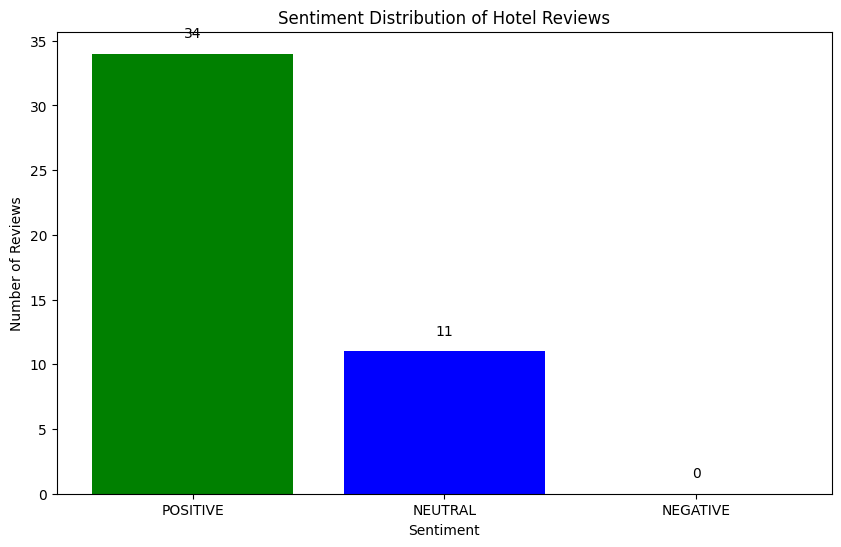

In [ ]:
import torch
from transformers import RobertaForSequenceClassification, RobertaTokenizer
import nltk
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from collections import Counter

nltk.download('punkt')

roberta_model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
roberta_tokenizer = RobertaTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

def read_reviews(file_path):
  # Read the file as a plain text file and store each line as a review
  with open(file_path, 'r', encoding='utf-8') as file:
    reviews = file.readlines()
  return reviews

def sentiment_analysis(text):
  inputs = roberta_tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
  with torch.no_grad():
    outputs = roberta_model(**inputs)
    scores = outputs.logits.detach().numpy()[0]
    sentiment = scores.argmax()
    if sentiment == 0:  # Negative
        return "NEGATIVE"
    elif sentiment == 1:  # Neutral
        return "NEUTRAL"
    else:  # Positive
        return "POSITIVE"

# Define function to analyze reviews and generate insights
def analyze_reviews(reviews):
    problems = []
    sentiment_counts = {"POSITIVE": 0, "NEUTRAL": 0, "NEGATIVE": 0}

    for review in reviews:
        # Tokenize the review into sentences
        sentences = sent_tokenize(review)
        for sentence in sentences:
            # Analyze sentiment of each sentence
            sentiment = sentiment_analysis(sentence)
            sentiment_counts[sentiment] += 1

            # If the sentiment is negative or neutral, consider it a problem
            if sentiment in ['NEGATIVE', 'NEUTRAL']:
                problems.append(sentence)

    return problems, sentiment_counts

def list_common_problems(problems):
    problem_counter = Counter(problems)
    most_common_problems = problem_counter.most_common(5)

    print("Top Issues Mentioned in Reviews:")
    for i, (problem, count) in enumerate(most_common_problems, start=1):
        print(f"{i}. {problem} (Mentioned {count} times)")


# Define function to visualize sentiment distribution
def visualize_sentiments(sentiment_counts):
    labels = list(sentiment_counts.keys())
    sizes = list(sentiment_counts.values())
    colors = ['green', 'blue', 'red']

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, sizes, color=colors)

    # Add text annotations on bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')
    plt.title('Sentiment Distribution of Hotel Reviews')
    plt.show()

# Main function to execute the analysis
def main():
    file_path = 'hotel_reviews.txt'  # Path to the file containing hotel reviews
    reviews = read_reviews(file_path)
    problems, sentiment_counts = analyze_reviews(reviews)
    list_common_problems(problems)
    visualize_sentiments(sentiment_counts)

if __name__ == "__main__":
    main()
